DATA and libraries

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import requests
from io import StringIO
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

In [15]:
# Define the ticker symbol for S&P 500
ticker_symbol = "^GSPC"

# Fetch historical data for S&P 500 from Yahoo Finance starting from January 1970
sp500_data = yf.download(ticker_symbol, start="1970-01-01", end="2020-11-01", interval="1mo")

# Extract the 'Close' prices from the S&P 500 data
sp500_close_prices = sp500_data['Close']

# List of URLs for additional data
urls = [
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=INDPRO",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNEMPLOY",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CE16OV",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PAYNSA_PC1",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CIVPART",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=POPTHM",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=HOUST",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PERMIT",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CD6M",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=TB3MS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=BUSLOANS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=MPRIME",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=LOANINV",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=M1REAL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=M2SL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=GS10",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CURRCIR",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PSAVERT",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PCE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DSPIC96",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=PMSAVE",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DEMDEPSL",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=WTISPLC",
    "https://fred.stlouisfed.org/graph/fredgraph.csv?id=DAUTOSA"
]

# Fetch and merge additional data
for url in urls:
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.content.decode('utf-8')), index_col='DATE', parse_dates=True)
    data = data.loc['1970-01-01':'2020-11-01']
    sp500_close_prices = pd.merge(sp500_close_prices, data, left_index=True, right_index=True)

print(sp500_close_prices.head())


[*********************100%%**********************]  1 of 1 completed


                 Close  CPIAUCSL   INDPRO  UNRATE  UNEMPLOY  CE16OV  PAYNSA  \
1985-01-01  179.630005     105.7  54.5342     7.3      8423  106302   95049   
1985-02-01  181.179993     106.3  54.7019     7.2      8321  106555   95259   
1985-03-01  180.660004     106.8  54.7739     7.2      8339  106989   96055   
1985-04-01  179.830002     107.0  54.6662     7.3      8395  106936   96875   
1985-05-01  189.550003     107.2  54.7472     7.2      8302  106932   97726   

            CIVPART    POPTHM   HOUST  ...   GS10  FEDFUNDS  CURRCIR  PSAVERT  \
1985-01-01     64.7  237535.0  1711.0  ...  11.38      8.35  180.656     10.2   
1985-02-01     64.7  237667.0  1632.0  ...  11.51      8.50  178.242      8.9   
1985-03-01     64.9  237816.0  1800.0  ...  11.86      8.58  179.037      8.6   
1985-04-01     64.9  237987.0  1821.0  ...  11.43      8.27  180.854      9.8   
1985-05-01     64.8  238172.0  1680.0  ...  10.85      7.97  182.460     11.0   

               PCE  DSPIC96  PMSAVE  D

In [16]:
# Define the correct file path
file_path = r"C:\Users\piotr\OneDrive\Pulpit\RR_data_30Y_text_1row.xlsx"

# Load the data from the first sheet
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset to verify
print(dataset)

                    Date        SP500  SP500 RoR  Consumer Price Index  \
0    1970-01-01 00:00:00    90.310000  -0.008781                37.900   
1    1970-02-01 00:00:00    87.160000  -0.034880                38.100   
2             01.03.1970    88.650000   0.017095                38.300   
3             01.04.1970    85.950000  -0.030457                38.500   
4             01.05.1970    76.060000  -0.115067                38.600   
..                   ...          ...        ...                   ...   
607  2020-08-01 00:00:00  3391.710000   0.057392               259.366   
608  2020-09-01 00:00:00  3365.516667  -0.007723               259.951   
609  2020-10-01 00:00:00  3418.701364   0.015803               260.249   
610  2020-11-01 00:00:00  3548.992500   0.038111               260.895   
611  2020-12-01 00:00:00  3695.310000   0.041228               262.005   

     Industrial Production: Total Index  Unemployment Rate  \
0                                  3201          

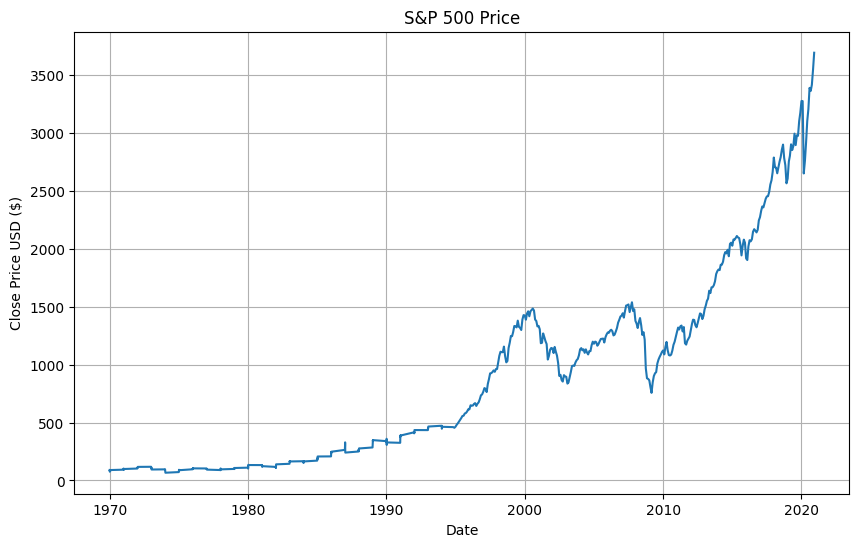

In [17]:
 # Load the data from the first sheet
file_path = r"C:\Users\piotr\OneDrive\Pulpit\RR_data_30Y_text_1row.xlsx"
dataset = pd.read_excel(file_path)

# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with missing or invalid dates
dataset = dataset.dropna(subset=['Date'])

# Plot the S&P 500 price
plt.figure(figsize=(10, 6))
plt.plot(dataset['Date'], dataset['SP500'], linestyle='-')
plt.title('S&P 500 Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.grid(True)
plt.show()

In [18]:
sp500_close_prices = dataset['SP500']

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_close_prices)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_close_prices, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_close_prices)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_close_prices)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test statistic: {adf_test_statistic}")
print(f"Critical value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test statistic: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test statistic: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test statistic: {za_test_statistic}")
print(f"P-value: {za_test_p_value}")
print("--------------------------------------------------")
print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test: Both tests indicate non-stationarity in the time series, as the test statistic exceeds the critical value at the 5% significance level.\nKPSS Test: Suggests strong evidence of non-stationarity, as the test statistic is significantly higher than the critical value at the 5% significance level.\nZivot-Andrews Test: Although the test statistic is negative, indicating some evidence of stationarity, the p-value is very high (close to 1), suggesting strong evidence against stationarity. ")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test statistic: 2.3101950596719973
Critical value (5%): -2.8664097967491498
--------------------------------------------------
Phillips-Perron Test:
Test statistic: 2.3101950596719973
Critical value (5%): -2.8664097967491498
--------------------------------------------------
KPSS Test:
Test statistic: 3.149565923832746
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test statistic: -1.2738193826799957
P-value: 0.9990000000000001
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test: Both tests indicate non-stationarity in the time series, as the test statistic exceeds the critical value at the 5% significance level.
KPSS Test: Suggests strong evidence of non-stationarity, as the test statistic is significantly higher than the critical value at the 5% significance level.
Zivot-Andrews Test: Although th

In [19]:
# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with missing or invalid dates
dataset = dataset.dropna(subset=['Date'])

# Calculate the new dependent variable based on S&P 500 prices
dataset['SP500_diff'] = dataset['SP500'].diff()  # Calculate the difference between consecutive S&P 500 prices

# Drop the first row containing NaN value for the new dependent variable
dataset = dataset.dropna(subset=['SP500_diff'])

# Display the dataset with the new dependent variable
print(dataset)

          Date     SP500  SP500 RoR  Consumer Price Index  \
1   1970-02-01  0.002951  -0.034880                38.100   
2   1970-01-03  0.003001   0.017095                38.300   
3   1970-01-04  0.002910  -0.030457                38.500   
4   1970-01-05  0.002575  -0.115067                38.600   
5   1970-01-06  0.002559  -0.006179                38.800   
..         ...       ...        ...                   ...   
607 2020-08-01  0.114824   0.057392               259.366   
608 2020-09-01  0.113937  -0.007723               259.951   
609 2020-10-01  0.115737   0.015803               260.249   
610 2020-11-01  0.120148   0.038111               260.895   
611 2020-12-01  0.125102   0.041228               262.005   

     Industrial Production: Total Index  Unemployment Rate  \
1                                  3453                4.2   
2                                  3635                4.4   
3                                  3797                4.6   
4                  

In [20]:
# Drop the first row containing NaN
sp500_diff_stat = dataset['SP500'].diff().dropna()

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_diff_stat)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_diff_stat, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_diff_stat)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_diff_stat)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test value: {adf_test_statistic}")
print(f"Test crit. Value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test value: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test value: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test value: {za_test_statistic}")
print(f"Test crit. Value (5%): {za_test_p_value}")
print("--------------------------------------------------")

print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. \nKPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.\nZivot-Andrews Test strongly supports stationarity in the time series, as its test statistic is highly negative and falls below the critical value at the 5% significance level.")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test value: -3.462226335862347
Test crit. Value (5%): -2.866418015869717
--------------------------------------------------
Phillips-Perron Test:
Test value: -3.462226335862347
Critical value (5%): -2.866418015869717
--------------------------------------------------
KPSS Test:
Test value: 0.8846453197223656
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test value: -4.757767552400836
Test crit. Value (5%): 0.059847079070650795
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. 
KPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.
Zivot-Andrews Test strongly supports stationarity in the time series, a

In [21]:
# Drop Date and SP500 RoR columns
Data_to_Standarize = dataset.drop(columns=['Date', 'SP500 RoR'])

print(Data_to_Standarize)

        SP500  Consumer Price Index  Industrial Production: Total Index  \
1    0.002951                38.100                                3453   
2    0.003001                38.300                                3635   
3    0.002910                38.500                                3797   
4    0.002575                38.600                                3919   
5    0.002559                38.800                                4071   
..        ...                   ...                                 ...   
607  0.114824               259.366                               13498   
608  0.113937               259.951                               12573   
609  0.115737               260.249                               11012   
610  0.120148               260.895                               10713   
611  0.125102               262.005                               10772   

     Unemployment Rate  Unemployment Level (thousands of Persons)  \
1                  4.2        

In [23]:
# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with missing or invalid dates
dataset = dataset.dropna(subset=['Date'])

# Calculate the new dependent variable based on S&P 500 prices
dataset['SP500_diff'] = dataset['SP500'].diff()  # Calculate the difference between consecutive S&P 500 prices

# Drop the first row containing NaN value for the new dependent variable
dataset = dataset.dropna(subset=['SP500_diff'])

# Display the dataset with the new dependent variable
print(dataset)

          Date     SP500  SP500 RoR  Consumer Price Index  \
2   1970-01-03  0.003001   0.017095                38.300   
3   1970-01-04  0.002910  -0.030457                38.500   
4   1970-01-05  0.002575  -0.115067                38.600   
5   1970-01-06  0.002559  -0.006179                38.800   
6   1970-01-07  0.002563   0.001720                38.900   
..         ...       ...        ...                   ...   
607 2020-08-01  0.114824   0.057392               259.366   
608 2020-09-01  0.113937  -0.007723               259.951   
609 2020-10-01  0.115737   0.015803               260.249   
610 2020-11-01  0.120148   0.038111               260.895   
611 2020-12-01  0.125102   0.041228               262.005   

     Industrial Production: Total Index  Unemployment Rate  \
2                                  3635                4.4   
3                                  3797                4.6   
4                                  3919                4.8   
5                  

In [24]:
# Drop the first row containing NaN
sp500_diff_stat = dataset['SP500'].diff().dropna()

# Conduct Augmented Dickey-Fuller test
adf_test_result = adfuller(sp500_diff_stat)
adf_test_statistic = adf_test_result[0]
adf_test_critical_value = adf_test_result[4]['5%']

# Conduct Phillips-Perron test
pp_test_result = adfuller(sp500_diff_stat, autolag='AIC')
pp_test_statistic = pp_test_result[0]
pp_test_critical_value = pp_test_result[4]['5%']

# Conduct KPSS test
kpss_test_result = kpss(sp500_diff_stat)
kpss_test_statistic = kpss_test_result[0]
kpss_test_critical_value = kpss_test_result[3]['5%']

# Conduct Zivot-Andrews test
za_test_result = zivot_andrews(sp500_diff_stat)
za_test_statistic = za_test_result[0]
za_test_p_value = za_test_result[1]

# Print the results
print("--------------------------------------------------")
print("Augmented Dickey-Fuller Test:")
print(f"Test value: {adf_test_statistic}")
print(f"Test crit. Value (5%): {adf_test_critical_value}")
print("--------------------------------------------------")
print("Phillips-Perron Test:")
print(f"Test value: {pp_test_statistic}")
print(f"Critical value (5%): {pp_test_critical_value}")
print("--------------------------------------------------")
print("KPSS Test:")
print(f"Test value: {kpss_test_statistic}")
print(f"Critical value (5%): {kpss_test_critical_value}")
print("--------------------------------------------------")
print("Zivot-Andrews Test:")
print(f"Test value: {za_test_statistic}")
print(f"Test crit. Value (5%): {za_test_p_value}")
print("--------------------------------------------------")

print("Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. \nKPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.\nZivot-Andrews Test strongly supports stationarity in the time series, as its test statistic is highly negative and falls below the critical value at the 5% significance level.")

--------------------------------------------------
Augmented Dickey-Fuller Test:
Test value: -3.4608101374961473
Test crit. Value (5%): -2.8664262627821473
--------------------------------------------------
Phillips-Perron Test:
Test value: -3.4608101374961473
Critical value (5%): -2.8664262627821473
--------------------------------------------------
KPSS Test:
Test value: 0.8836052275559865
Critical value (5%): 0.463
--------------------------------------------------
Zivot-Andrews Test:
Test value: -4.753687949364166
Test crit. Value (5%): 0.06060644230433954
--------------------------------------------------
Augmented Dickey-Fuller (ADF) Test and Phillips-Perron Test both indicate stationarity in the time series, as their test statistics are lower than the critical values at the 5% significance level. 
KPSS Test suggests non-stationarity, as its test statistic exceeds the critical value at the 5% significance level.
Zivot-Andrews Test strongly supports stationarity in the time series

In [25]:
# Convert all columns to numeric format
Data_to_Standarize = Data_to_Standarize.apply(pd.to_numeric, errors='coerce')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(Data_to_Standarize)

# Transform the data
Data_standarized = scaler.transform(Data_to_Standarize)

# Convert the numpy array back to a DataFrame
Data_standarized = pd.DataFrame(Data_standarized, columns=Data_to_Standarize.columns)

print(Data_standarized)

        SP500  Consumer Price Index  Industrial Production: Total Index  \
0   -0.950302             -1.667344                           -1.806459   
1   -0.948489             -1.664361                           -1.734898   
2   -0.951775             -1.661379                           -1.671201   
3   -0.963814             -1.659887                           -1.623232   
4   -0.964386             -1.656905                           -1.563467   
..        ...                   ...                                 ...   
606  3.072269              1.632439                            2.143146   
607  3.040384              1.641163                            1.779444   
608  3.105125              1.645607                            1.165673   
609  3.263726              1.655241                            1.048109   
610  3.441836              1.671795                            1.071307   

     Unemployment Rate  Unemployment Level (thousands of Persons)  \
0            -1.224522        

In [32]:
# Define the features and target
features = [
    'Consumer Price Index', 'Industrial Production: Total Index', 'Unemployment Rate',
    'Unemployment Level (thousands of Persons)', 'Employment Level', 'All Employees, Total Nonfarm',
    'Labor Force Participation Rate', 'Population', 'Housing Units Started', 'Housing Units Permit',
    'Average Rate on 6-Month Negotiable Certificates of Deposit (Secondary Market)',
    '3-Month Treasury Bill ', 'Commercial and Industrial Loans', 'Bank Prime Loan Rate ',
    'Bank Credit, All Commercial Banks', 'Real M1 Money Stock', 'M2',
    'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity',
    'Federal Funds Effective Rate', 'Currency in Circulation', ' Personal Saving Rate',
    'Personal Consumption Expenditures', 'Real Disposable Personal Income', 'Personal Saving',
    'Demand Deposits', 'Spot Crude Oil Price: West Texas Intermediate (WTI)',
    'Motor Vehicle Retail Sales: Domestic Autos'
]

target = 'SP500'

# Remove any rows with missing values
dataset_cleaned = Data_to_Standarize.dropna(subset=features + [target])

# Define the feature matrix (X) and the target vector (y)
X = dataset_cleaned[features]
y = dataset_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1178473196319358e-05


In [31]:
print(Data_to_Standarize.columns)

Index(['SP500', 'Consumer Price Index', 'Industrial Production: Total Index',
       'Unemployment Rate', 'Unemployment Level (thousands of Persons)',
       'Employment Level', 'All Employees, Total Nonfarm',
       'Labor Force Participation Rate', 'Population', 'Housing Units Started',
       'Housing Units Permit',
       'Average Rate on 6-Month Negotiable Certificates of Deposit (Secondary Market)',
       '3-Month Treasury Bill ', 'Commercial and Industrial Loans',
       'Bank Prime Loan Rate ', 'Bank Credit, All Commercial Banks',
       'Real M1 Money Stock', 'M2',
       'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity',
       'Federal Funds Effective Rate', 'Currency in Circulation',
       ' Personal Saving Rate', 'Personal Consumption Expenditures',
       'Real Disposable Personal Income', 'Personal Saving', 'Demand Deposits',
       'Spot Crude Oil Price: West Texas Intermediate (WTI)',
       'Motor Vehicle Retail Sales: Domestic Autos', 'SP500_d